<ipython-input-2-d5d026132d30>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  true_df['sentiment'] = 1  # Tandai sebagai berita asli
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Hasil Evaluasi:
                  Algorithm  Accuracy  Precision  F1-score
0  Agglomerative Clustering     0.332   0.407561  0.328797
1                    DBSCAN     0.500   0.250000  0.333333


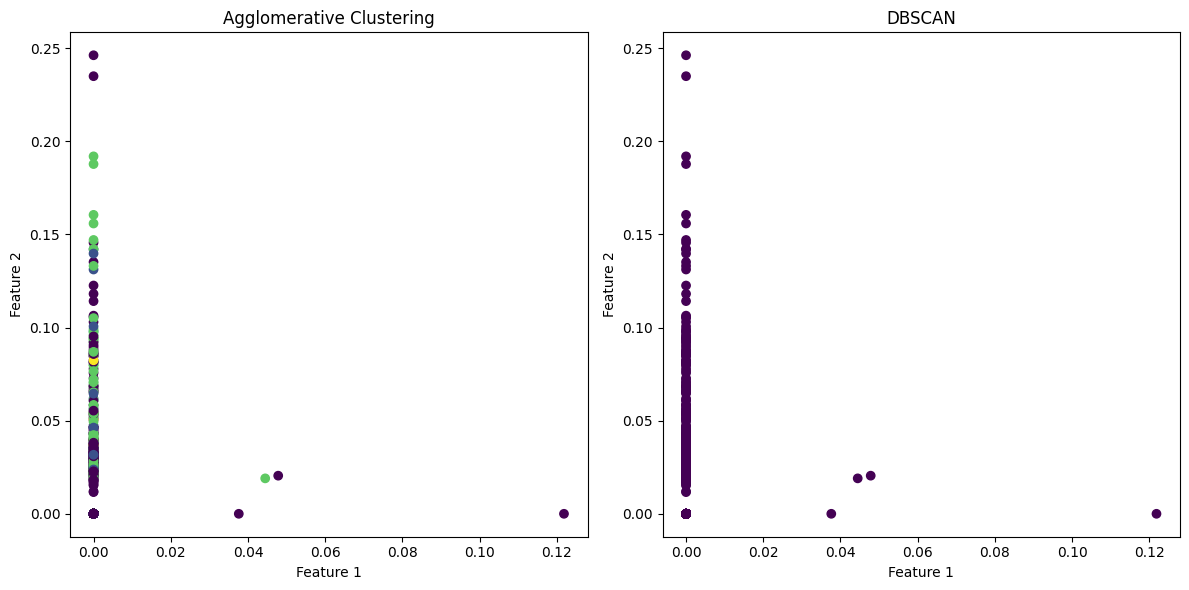

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import AgglomerativeClustering, DBSCAN
from sklearn.metrics import accuracy_score, precision_score, f1_score
from sklearn.preprocessing import LabelEncoder

true_df = pd.read_csv('/content/drive/MyDrive/NLP 20231/DATASET/fake.csv')
fake_df = pd.read_csv('/content/drive/MyDrive/NLP 20231/DATASET/true.csv')

true_df = true_df.head(1000)
fake_df = fake_df.head(1000)

true_df['sentiment'] = 1
fake_df['sentiment'] = 0

df = pd.concat([true_df, fake_df], ignore_index=True)

def text_clustering():
    try:
        df.dropna(inplace=True)

        if len(df) < 2:
            print("Jumlah sampel tidak cukup untuk klasterisasi")
            return

        vectorizer = TfidfVectorizer(stop_words='english')
        X = vectorizer.fit_transform(df['text'])

        num_clusters = 5
        hac = AgglomerativeClustering(n_clusters=num_clusters, affinity='euclidean', linkage='ward')

        hac_labels = hac.fit_predict(X.toarray())

        dbscan = DBSCAN(eps=1.5, min_samples=3)

        dbscan_labels = dbscan.fit_predict(X)

        hac_accuracy = accuracy_score(df['sentiment'], hac_labels)
        hac_precision = precision_score(df['sentiment'], hac_labels, average='weighted')
        hac_f1 = f1_score(df['sentiment'], hac_labels, average='weighted')

        dbscan_accuracy = accuracy_score(df['sentiment'], dbscan_labels)
        dbscan_precision = precision_score(df['sentiment'], dbscan_labels, average='weighted')
        dbscan_f1 = f1_score(df['sentiment'], dbscan_labels, average='weighted')

        results = pd.DataFrame({
            'Algorithm': ['Agglomerative Clustering', 'DBSCAN'],
            'Accuracy': [hac_accuracy, dbscan_accuracy],
            'Precision': [hac_precision, dbscan_precision],
            'F1-score': [hac_f1, dbscan_f1]
        })

        print("Hasil Evaluasi:")
        print(results)

        plt.figure(figsize=(12, 6))

        plt.subplot(1, 2, 1)
        plt.scatter(X.toarray()[:, 0], X.toarray()[:, 1], c=hac_labels, cmap='viridis')
        plt.title('Agglomerative Clustering')
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')

        plt.subplot(1, 2, 2)
        plt.scatter(X.toarray()[:, 0], X.toarray()[:, 1], c=dbscan_labels, cmap='viridis')
        plt.title('DBSCAN')
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')

        plt.tight_layout()
        plt.show()

    except Exception as e:
        print("Terjadi kesalahan:", e)

text_clustering()